# Econometrics


### Introduction 

I will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz (available on Canvas). Please familiarize yourself with the PROGRESA program before beginning this problem set, so you have a rough sense of where the data come from and how they were generated. If you just proceed into the problem set without understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic econometric techniques that you are learning in class to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from Canvas. The data are actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in each year. For each child-year observation, the following variables are collected:

| Variable name | Description|
|------|------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = 1|
|progresa |treatment =1|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	|gender of head of household (male=1)|
|hohage	|age of head of household|
|age	|years old|
|folnum	|individual id|
|village|	village id|
|sc97	|schooling in 1997|

In [60]:
# Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
import scipy.stats as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf

---

##Part 1: Descriptive analysis

### 1.1	Summary Statistics

Present summary statistics (mean and standard deviation) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village). Present these in a single table alphabetized by variable name. Do NOT simply expect the grader to scroll through your output!

In [61]:
# reading data
df = pd.read_csv('progresa_sample.csv')
# mapping the progresa variable properly
df['progresa'] = df['progresa'].map({'0': 0, 'basal': 1})
# including only the relevant columns
df1 = df.ix[:,'sex':'age']
df2 = df.ix[:,'grc97':'sc97']
progressa = pd.concat([df1, df2], axis=1, join= 'inner')
# summary statistics for the demographic variables
progressa.describe()

,sex,indig,dist_sec,sc,grc,fam_n,min_dist,dist_cap,progresa,hohedu,hohwag,welfare_index,hohsex,hohage,age,grc97,sc97
count,77226.000000,76950.000000,77250.000000,68797.000000,70701.000000,77250.000000,77250.000000,77250.000000,77250.000000,77250.000000,77250.000000,77040.000000,77230.000000,77240.000000,77250.000000,77250.000000,73378.000000
mean,0.512211,0.298324,2.418910,0.819818,3.963537,7.215715,103.447520,147.674452,0.615663,2.768104,586.985312,690.346564,0.925185,44.436717,11.366460,3.705372,0.813922
std,0.499854,0.457525,2.234109,0.384342,2.499063,2.352900,42.089441,76.063134,0.486441,2.656106,788.133664,139.491130,0.263095,11.620372,3.167744,2.572387,0.389172
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.465392,9.465392,0.000000,0.000000,0.000000,180.000000,0.000000,15.000000,6.000000,0.000000,0.000000
25%,0.000000,0.000000,0.574000,1.000000,2.000000,6.000000,70.518238,92.327050,0.000000,0.000000,120.000000,597.000000,1.000000,36.000000,9.000000,1.000000,1.000000
50%,1.000000,0.000000,2.279000,1.000000,4.000000,7.000000,111.228612,132.001494,1.000000,2.000000,500.000000,685.000000,1.000000,43.000000,11.000000,4.000000,1.000000
75%,1.000000,1.000000,3.582000,1.000000,6.000000,9.000000,138.446009,184.445225,1.000000,4.000000,750.000000,770.000000,1.000000,51.000000,14.000000,6.000000,1.000000
max,1.000000,1.000000,14.879000,1.000000,14.000000,24.000000,170.457647,359.774457,1.000000,20.000000,14000.000000,1294.000000,1.000000,98.000000,17.000000,14.000000,1.000000


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages? Hint: Use a T-Test to determine whether there is a statistically significant difference in the average values of each of the variables in the dataset. Focus only on the data from 1997 for individuals who are poor (i.e., poor=='pobre').

Present your results in a single table with the following columns and 14 (or so) rows:

| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male|?|?|?|?|


In [62]:
# getting baseline data
baseline = df[df['year']==97]
# extracting relevant data
poor_baseline = baseline[baseline['poor']=='pobre']
treatment = poor_baseline[poor_baseline['progresa']==1]
control = poor_baseline[poor_baseline['progresa']==0]

In [63]:
# choosing only relevant columns
treatment = pd.concat([treatment.ix[:,'dist_sec':'dist_cap'], treatment.ix[:,'hohedu':'welfare_index'],treatment.ix[:,'hohage':'age'],treatment.ix[:,'grc97':'sc97']], axis=1, join= 'inner')
control = pd.concat([control.ix[:,'dist_sec':'dist_cap'], control.ix[:,'hohedu':'welfare_index'],control.ix[:,'hohage':'age'],control.ix[:,'grc97':'sc97']], axis=1, join= 'inner')
testcol = list(treatment.columns.values)

In [64]:
# Creating an empty dataframe to store the results
testRes = pd.DataFrame(index=range(1,len(testcol)+1), columns=['Variable name','Average value (Treatment villages)','Average value (Control villages)','Difference (Treat - Control)','p-value'])
# assigning values to the columns
testRes['Variable name'] = testcol
testRes['Average value (Treatment villages)'] = pd.Series.tolist(treatment.mean(axis=0))
testRes['Average value (Control villages)'] = pd.Series.tolist(control.mean(axis=0))
testRes['Difference (Treat - Control)'] = testRes['Average value (Treatment villages)']-testRes['Average value (Control villages)']

In [65]:
# creating empty list to store p-values
tres = list()
# loop to run t-test for each variable
for i in range(0,len(treatment.columns)):
    temp = sp.ttest_ind(np.array(treatment[~np.isnan(treatment.iloc[:,i])].iloc[:,i]),np.array(control[~np.isnan(control.iloc[:,i])].iloc[:,i]),equal_var=False)
    temp = pd.Series(temp,index=['tvalue','pvalue'])    
    tres.append(temp.pvalue) 
testRes['p-value'] = tres
# results in tabular fashion
testRes

,Variable name,Average value (Treatment villages),Average value (Control villages),Difference (Treat - Control),p-value
1,dist_sec,2.453122,2.507662,-0.054540,4.266282e-02
2,sc,0.822697,0.815186,0.007511,9.646120e-02
3,grc,3.531599,3.543050,-0.011450,6.895228e-01
4,fam_n,7.281327,7.302469,-0.021142,4.289667e-01
5,min_dist,107.152915,103.237854,3.915060,7.055795e-16
6,dist_cap,150.829074,153.769730,-2.940656,1.146482e-03
7,hohedu,2.663139,2.590348,0.072791,1.038219e-02
8,hohwag,544.339544,573.163558,-28.824015,3.287285e-04
9,welfare_index,655.428377,659.579100,-4.150723,1.531678e-03
10,hohage,43.648828,44.276918,-0.628090,2.259461e-06


In [66]:
# variables(demographics) that are statistically different in the treatment and control villages
testRes[testRes['p-value']>=0.05]

,Variable name,Average value (Treatment villages),Average value (Control villages),Difference (Treat - Control),p-value
2,sc,0.822697,0.815186,0.007511,0.096461
3,grc,3.531599,3.543050,-0.011450,0.689523
4,fam_n,7.281327,7.302469,-0.021142,0.428967
11,age,10.716991,10.742023,-0.025032,0.478363
12,grc97,3.531599,3.543050,-0.011450,0.689523
13,sc97,0.822697,0.815186,0.007511,0.096461


In [67]:
# variables(demographics) that are statistically not different in the treatment and control villages
testRes[testRes['p-value']<0.05]

,Variable name,Average value (Treatment villages),Average value (Control villages),Difference (Treat - Control),p-value
1,dist_sec,2.453122,2.507662,-0.054540,4.266282e-02
5,min_dist,107.152915,103.237854,3.915060,7.055795e-16
6,dist_cap,150.829074,153.769730,-2.940656,1.146482e-03
7,hohedu,2.663139,2.590348,0.072791,1.038219e-02
8,hohwag,544.339544,573.163558,-28.824015,3.287285e-04
9,welfare_index,655.428377,659.579100,-4.150723,1.531678e-03
10,hohage,43.648828,44.276918,-0.628090,2.259461e-06


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages as baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

A. There are statistically significant differences in some of the demographics of treatment and control villages as baseline.

B. If there are already differences in the treatment and control villages, the research design most appropriate would be double difference as it would account for the differences in treatment and control groups even before the treatment or intervention happens.

C. The impact would be most appropriately measured by double difference research design.

### 1.4 Graphical exploration, part 1

For each level of household head education, compute the average enrollment rate in 1997. Create a scatterplot that shows this relationship. What do you notice?

In [68]:
# creating baseline data
baseline = df[df['year']==97]
# removing nas in sc variable
baseline_mod = baseline[~np.isnan(baseline['sc'])]
# grouping enrollments by level of household head education
grouped = baseline_mod.ix[:,['sc','hohedu']].groupby(['hohedu']).mean()
hohedu_sc = pd.DataFrame({'hohedu':grouped.index,'sc':grouped.sc},index=range(1,len(grouped)+1))
hohedu_sc

,hohedu,sc
1,0,0.768537
2,1,0.794552
3,2,0.802956
4,3,0.842951
5,4,0.849835
6,5,0.878469
7,6,0.889535
8,7,0.900000
9,8,0.925023
10,9,0.865385


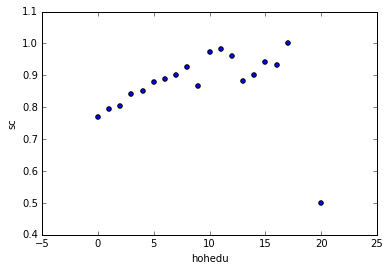

In [69]:
# For plotting inline
%matplotlib inline
# Scatterplot of enrollments Vs level of household head education
hohedu_sc.plot(kind='scatter', x='hohedu', y='sc');

The scatterplot shows that the enrollments have a positive linear relationship with the level of household head education, except for the highest level of household education.

### 1.5 Graphical exploration, part 2

Create a histogram of village enrollment rates **among poor households in treated villages**, before and after treatment. Specifically, for each village, calculate the average rate of enrollment of poor households in treated villages in 1997, then compute the average rate of enrollment of poor households in treated villages in 1998. Create two separate histograms showing the distribution of these average enrollments rates, one histogram for 1997 and one histogram for 1998. On each histogram, draw a vertical line that intersects the x-axis at the average value (across all households). Does there appear to be a difference? Is this difference statistically significant?

In [70]:
# extracting relevant datasets
poor = df[df['poor']=='pobre']
treatment = poor[poor['progresa']==1]
pre_treatment = treatment[treatment['year']==97]
post_treatment = treatment[treatment['year']==98]

In [71]:
# removing nas
pre_treatment = pre_treatment[~np.isnan(pre_treatment['sc'])]  
post_treatment = post_treatment[~np.isnan(post_treatment['sc'])]  

In [72]:
# calculating average enrollments by village for pre treatment group
pre_grouped = pre_treatment.ix[:,['village','sc']].groupby(['village']).mean()
x = pd.Series(pre_grouped.index)
y = pre_grouped.sc
y.index = range(0,len(y))
pre_enrollment = pd.DataFrame({'village':x,'sc':y})

In [73]:
# calculating average enrollments by village for post treatment group
post_grouped = post_treatment.ix[:,['village','sc']].groupby(['village']).mean()
x = pd.Series(post_grouped.index)
y = post_grouped.sc
y.index = range(0,len(y))
post_enrollment = pd.DataFrame({'village':x,'sc':y})

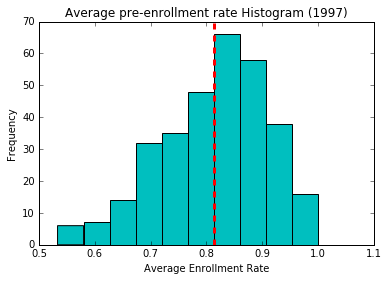

In [74]:
# plotting histogram for pre-enrollment rates (1997)
plt.hist(pre_enrollment['sc'],color='c')
plt.title("Average pre-enrollment rate Histogram (1997)")
plt.xlabel("Average Enrollment Rate")
plt.ylabel("Frequency")
fig = plt.gcf()
plt.axvline(pre_enrollment['sc'].mean(), color='r', linestyle='dashed', linewidth=3)

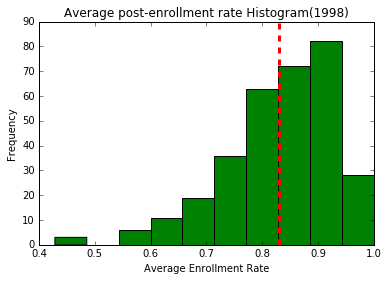

In [75]:
# plotting histogram for post-enrollment rates (1998)
plt.hist(post_enrollment['sc'],color='g')
plt.title("Average post-enrollment rate Histogram(1998)")
plt.xlabel("Average Enrollment Rate")
plt.ylabel("Frequency")
fig = plt.gcf()
plt.axvline(post_enrollment['sc'].mean(), color='r', linestyle='dashed', linewidth=3)

In [76]:
# t-test of the average enrollments for pre and post treatment villages
sp.ttest_ind(pre_enrollment['sc'],post_enrollment['sc'],equal_var=False)

Ttest_indResult(statistic=-2.0157134865156379, pvalue=0.044249343422588405)

The histogram plots show that there is difference in the average enrollment rates of the villages between 1997 and 1998. This is confirmed by the t-test, which shows that there is a statistically significant difference (p-value < 0.05) in the average enrollment rate for treatment villages in 1997 and 1998.

## Part 2: Measuring Impact

Our goal is to estimate the causal impact of the PROGRESA program on the social and economic outcomes of individuals in Mexico. We will focus on the impact of the program on the poor (those with poor=='pobre'), since only the poor were eligible to receive the PROGRESA assistance.

### 2.1 Simple differences: T-test

Begin by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment), calculate the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages. Use a t-test to determine if this difference is statistically significant. What do you conclude?

In [77]:
# extracting relevant data
endline = poor[poor['year']==98]
endline_treatment = endline[endline['progresa']==1]
endline_control = endline[endline['progresa']==0]
# removing nas
endline_treatment = endline_treatment[~np.isnan(endline_treatment['sc'])]  
endline_control = endline_control[~np.isnan(endline_control['sc'])]  

In [78]:
# calculating average enrollments by village for post treatment group
treatment_grouped = endline_treatment.ix[:,['village','sc']].groupby(['village']).mean()
x = pd.Series(treatment_grouped.index)
y = treatment_grouped.sc
y.index = range(0,len(y))
treatment_enrollment = pd.DataFrame({'village':x,'sc':y})

In [79]:
# calculating average enrollments by village for post control group
control_grouped = endline_control.ix[:,['village','sc']].groupby(['village']).mean()
x = pd.Series(control_grouped.index)
y = control_grouped.sc
y.index = range(0,len(y))
control_enrollment = pd.DataFrame({'village':x,'sc':y})

In [80]:
sp.ttest_ind(treatment_enrollment['sc'],control_enrollment['sc'],equal_var=False)

Ttest_indResult(statistic=2.5286761113653493, pvalue=0.01184670373341134)

The t-test shows that there is a statistically significant difference (p-value < 0.05) between the average enrollment rates in treatment and control villages in 1998.

### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. Discuss the following:

* Based on this model, how much did Progresa increase the likelihood of a child enrolling?
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

In [81]:
#removing nas
endline = endline[~np.isnan(endline['sc'])]

In [82]:
# OLS Regression for enrollments and treatment assignment
x = endline['progresa']
y = endline['sc']
x = sm.add_constant(x)
results = sm.OLS(y, x).fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Tue, 26 Jan 2016   Prob (F-statistic):           6.64e-17
Time:                        11:40:40   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.8076      0.004    220.676      0.0

* Based on this model, how much did Progresa increase the likelihood of a child enrolling?

The regresssion shows that there is a statistically significant relationship between treatment assignment and enrollment rates of the poor. 
The relationship between treatment assignment and enrollment rates of the poor is given by -
enrollment_rate = 0.8076 + 0.0388 * treatment_assignment + error_term

This means that for the treatment villages the average enrollment rate is 0.8464, whereas for the control villages, it is 0.8076.

According to the regression, the Progresa program increased the child enrollment by 0.0388.

* How does your regression estimate compare to your t-test estimate from part 2.1?

The t-value and p-value from the t-test suggest that there is a statistically significant difference between the enrollment rates of the treatment and control villages. The regression confirms this since there is an average enrollment rate difference of about 0.0388 between treatment and control villages. The p-value of the progresa variable confirms that there is a statistically significant difference between the enrollment rates of the treatment and control villages.

* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 

Based on the regression model, we can reject the null hypothesis that the treatment effects are zero, as the p-value is very close to zero.

* What is the counterfactual assumption underlying this regression?

The counterfactual assumption underlying this regression is that, in the absence of treatment, the enrollment rates of the treatment villages would be same as the control villages.

### 2.3 Multiple Regression

Re-run the above regression estimated but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, welfare index, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

In [83]:
#removing nas
endline = endline[~np.isnan(endline['sc'])]
endline = endline[~np.isnan(endline['progresa'])]
endline = endline[~np.isnan(endline['fam_n'])]
endline = endline[~np.isnan(endline['grc'])]
endline = endline[~np.isnan(endline['age'])]

In [84]:
# OLS regression for enrollments
x = endline[['progresa','fam_n','grc','age']]
y = endline['sc']
x = sm.add_constant(x)
model = sm.OLS(y,x)
result = model.fit()
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     2798.
Date:                Tue, 26 Jan 2016   Prob (F-statistic):               0.00
Time:                        11:40:40   Log-Likelihood:                -7249.0
No. Observations:               27390   AIC:                         1.451e+04
Df Residuals:                   27385   BIC:                         1.455e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.7399      0.011    157.542      0.0

* How do the controls affect the point estimate of treatment effect?

The multivariate regression shows that there is a statistically significant relationship between enrollment rates and treatment assignment, grade that the child is enrolled in and age of the child enrolled. Of the 3 predictors, age of the child has the most impact on the enrollment rate, namely -0.1019. The point estimate for the predictor variable reduces by about 0.0043 when the control variables are added.

* How do the controls affect the standard error on the treatment effect? 

The standard error for the progresa variable in question 2.2 is 0.005, whereas the standard error in 2.3 is  0.004. The standard error for the estimating the progresa variable reduces when the control variables are added.

* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

In 2.2, the point estimate for the treatment assignment (progresa variable) is 0.0388, whereas in 2.3, the point estimate when adding the control variables is 0.0345. The point estimate for the predictor variable reduces when the control variables are added. The coefficient estimates and standard errors are hardly much different in 2.2 and 2.3, suggesting that the treatment assignment (progresa) variable is not correlated with the control variables used in the regression. 

### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among poor households in control villages. The difference between these two differences is your estimate.

* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 


In [85]:
# extracting relevant data
poor = df[df['poor']=='pobre']
baseline = poor[poor['year']==97]
endline = poor[poor['year']==98]
# removing nas
baseline = baseline[~np.isnan(baseline['sc'])]  
endline = endline[~np.isnan(endline['sc'])]  

In [86]:
# categorizing the data into pre/post and treatment/control
baseline_treatment = baseline[baseline['progresa']==1]
baseline_control = baseline[baseline['progresa']==0]
endline_treatment = endline[endline['progresa']==1]
endline_control = endline[endline['progresa']==0]

In [87]:
# calculating average enrollments by village for baseline(pre) treatment group
baseline_treatment_grouped = baseline_treatment.ix[:,['village','sc']].groupby(['village']).mean()
x = pd.Series(baseline_treatment_grouped.index)
y = baseline_treatment_grouped.sc
y.index = range(0,len(y))
baseline_treatment_enrollment = pd.DataFrame({'village':x,'sc':y})

In [88]:
# calculating average enrollments by village for baseline(pre) control group
baseline_control_grouped = baseline_control.ix[:,['village','sc']].groupby(['village']).mean()
x = pd.Series(baseline_control_grouped.index)
y = baseline_control_grouped.sc
y.index = range(0,len(y))
baseline_control_enrollment = pd.DataFrame({'village':x,'sc':y})

In [89]:
# calculating average enrollments by village for endline(post) treatment group
endline_treatment_grouped = endline_treatment.ix[:,['village','sc']].groupby(['village']).mean()
x = pd.Series(endline_treatment_grouped.index)
y = endline_treatment_grouped.sc
y.index = range(0,len(y))
endline_treatment_enrollment = pd.DataFrame({'village':x,'sc':y})

In [90]:
# calculating average enrollments by village for endline(post) control group
endline_control_grouped = endline_control.ix[:,['village','sc']].groupby(['village']).mean()
x = pd.Series(endline_control_grouped.index)
y = endline_control_grouped.sc
y.index = range(0,len(y))
endline_control_enrollment = pd.DataFrame({'village':x,'sc':y})

In [91]:
# calculating difference in treatment villages
treatment_diff = pd.merge(baseline_treatment_enrollment,endline_treatment_enrollment,on=['village'], how='inner',suffixes=('_97', '_98'))
diff = treatment_diff['sc_98']-treatment_diff['sc_97']
treatment_diff = pd.concat([treatment_diff, diff], axis=1, join= 'inner')
treatment_diff.columns = ['sc_97','village','sc_98','difference']

In [92]:
# calculating difference in control villages
control_diff = pd.merge(baseline_control_enrollment,endline_control_enrollment,on=['village'], how='inner',suffixes=('_97', '_98'))
diff = control_diff['sc_98']-control_diff['sc_97']
control_diff = pd.concat([control_diff, diff], axis=1, join= 'inner')
control_diff.columns = ['sc_97','village','sc_98','difference']

In [93]:
# difference-in-difference impact evaluation
treatment_diff['difference'].mean()-control_diff['difference'].mean()

0.02328852365969893

* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?

The estimated impact due to double difference (tabular) is about 0.0233 unit increase in average enrollment rates due to the Progressa program. The point estimate of the impact is lower than the point estimate of the impact calculated by simple difference (0.0388).

* What is the counterfactual assumption underlying this estimate? 

The counterfactual assumption is that, in the absence of the treatment, the average enrollment rates for the treatment villages in the year of 1998 would form the counterfactual. This is based on the parallel trend assumption which states that the difference between the treatment and the control groups will follow a parallel trend in the absence of treatment or intervention.


### 2.5 Difference-in-Difference, version 1 (regression)

Now use a regression specification to estimate the average treatment effects of the program in a difference-in-differences framework. Include at least 5 control variables.

* What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
* How do these estimates of the treatment effect compare to the estimates based on the simple difference?
* How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?
* What is the counterfactual assumption underlying this regression? 

In [94]:
# Creating a new variable for double difference estimation
dd = df[df['poor']=='pobre']
#removing nas
dd = dd[~np.isnan(dd['sc'])]
dd = dd[~np.isnan(dd['progresa'])]
dd = dd[~np.isnan(dd['fam_n'])]
dd = dd[~np.isnan(dd['grc'])]
dd = dd[~np.isnan(dd['age'])]
dd = dd[~np.isnan(dd['dist_sec'])]
dd = dd[~np.isnan(dd['hohedu'])]
# Adding a new binary column for the pre-post category
dd['post'] = dd['year'].map({97: 0, 98: 1})

In [95]:
# difference-in-difference regression
results = smf.ols(formula='sc ~ progresa * post + village + fam_n + grc + age + dist_sec + hohedu', data=dd).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     2782.
Date:                Tue, 26 Jan 2016   Prob (F-statistic):               0.00
Time:                        11:40:40   Log-Likelihood:                -15847.
No. Observations:               58312   AIC:                         3.171e+04
Df Residuals:                   58302   BIC:                         3.180e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         1.6766      0.009    195.937      0.000         1.660     1.693
progresa          0.0076      0.004      2.018      0.044         0.000     0.015
post              0.0249      0.004      5.811      0.000         0.016     0.033
progresa:post     0.0297      0.005      5.479      0.000         0.019     0.040
village        5.711e-05      9e-06      6.344      0.000      3.95e-05  7.48e-05
fam_n           3.12e-05      0.001      0.055      0.956        -0.001     0.001
grc               0.0478      0.001     47.333      0.000         0.046     0.050
age              -0.0976      0.001   -119.809      0.000        -0.099    -0.096
dist_sec         -0.0063      0.001    -10.224      0.000        -0.008    -0.005
hohedu            0.0041      0.001      7.585      0.000         0.003     0.005
==============================================================================
Omnibus:                     6193.941   Durbin-Watson:                   1.497
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8348.945
Skew:                          -0.895   Prob(JB):                         0.00
Kurtosis:                       3.480   Cond. No.                     2.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.

The impact of Progresa estimated by regression is about 0.0297. The difference-in-difference regression shows that the average enrollment rates has statistically significant relationship with treatment assignment (progresa variable), post (pre-post variable), interaction between progresa and post variable, village, grade that the child has enrolled in, age of child, nearest distance to a secondary school and years of schooling of head of household. The standard error is highest for the estimate of the intercept. For most predictors, the standard error is close to 0.001. This gives us the confidence in the estimated coefficients as their standard error is very close to zero. The mean age of the child seems to have the highest coefficient estimate of 0.098. 

Result of the regression -
sc = 1.6766 + 0.0076(progresa) + 0.0249 (post) + 0.0297 (progesa X post) + 5.711e-05(village) + 3.12e-05(fam_n_mean) + 0.0478 ( grc_mean) + (-0.0976)(age_mean) + (-0.0063)(dist_sec_mean) + 0.0041 (hohedu_mean)

* How do these estimates of the treatment effect compare to the estimates based on the simple difference?

The estimate of the impact is lower when using double difference, namely 0.0297 whereas the estimate of impact using simple difference is higher, namely 0.0388.

* How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?

The estimate of the impact using difference-in-difference regression is 0.0297 which is slightly higher than the estimate of 0.0233 obtained in 2.4 question. The slight difference could be due to the errors in estimation both in the regression and the tabular method.

* What is the counterfactual assumption underlying this regression?

The counterfactual assumption is that, in the absence of the treatment, the trends in the treatment and control group would have been the same.


### 2.6 Difference-in-Difference, version 2

In the previous problem, you estimated a difference-in-differences model that compared changes in enrollment rates over time across treatment and control villages. An alternative approach would be to compare enrollment rates in 1998 between poor and non-poor across treatment and control villages. 

* How would we estimate this version of the treatment effects in a regression model? 
* What is the counterfactual assumption underlying this regression?
* How do these treatment effects compare to the estimates above?
* Discuss some possible explanations for differences or similarities 

In [96]:
# extracting 1998 data
dd2 = df[df['year']==98]
#removing nas
dd2 = dd2[~np.isnan(dd2['sc'])]
dd2 = dd2[~np.isnan(dd2['progresa'])]
dd2 = dd2[~np.isnan(dd2['fam_n'])]
dd2 = dd2[~np.isnan(dd2['grc'])]
dd2 = dd2[~np.isnan(dd2['age'])]
dd2 = dd2[~np.isnan(dd2['dist_sec'])]
dd2 = dd2[~np.isnan(dd2['hohedu'])]
# mapping the poor variable to binary value
dd2['poor_var'] = dd2['poor'].map({'pobre': 1, 'no pobre': 0})

In [97]:
# difference-in-difference regression
results2 = smf.ols(formula='sc ~ progresa * poor_var + village + fam_n + grc + age + dist_sec + hohedu', data=dd2).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     1501.
Date:                Tue, 26 Jan 2016   Prob (F-statistic):               0.00
Time:                        11:40:41   Log-Likelihood:                -8706.9
No. Observations:               32032   AIC:                         1.743e+04
Df Residuals:                   32022   BIC:                         1.752e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             1.7177      0.014    127.063      0.000         1.691     1.744
progresa              0.0280      0.010      2.940      0.003         0.009     0.047
poor_var              0.0134      0.008      1.661      0.097        -0.002     0.029
progresa:poor_var     0.0088      0.010      0.855      0.393        -0.011     0.029
village            5.498e-05   1.23e-05      4.465      0.000      3.08e-05  7.91e-05
fam_n                -0.0004      0.001     -0.482      0.629        -0.002     0.001
grc                   0.0524      0.001     38.306      0.000         0.050     0.055
age                  -0.1018      0.001    -90.230      0.000        -0.104    -0.100
dist_sec             -0.0072      0.001     -8.723      0.000        -0.009    -0.006
hohedu                0.0057      0.001      8.290      0.000         0.004     0.007
==============================================================================
Omnibus:                     3576.663   Durbin-Watson:                   1.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4892.221
Skew:                          -0.920   Prob(JB):                         0.00
Kurtosis:                       3.531   Cond. No.                     2.92e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* How would we estimate this version of the treatment effects in a regression model?

The estimate of the impact using this regression model is 0.0088. But the estimate is not statistically significant as the p-value is greater than 0.05.

* What is the counterfactual assumption underlying this regression?

The counterfactual assumption underlying this regression is that, in the absence of the treatment, the enrollment of the poor in the control villages would form the counterfactual. 

* How do these treatment effects compare to the estimates above?

The estimate of the impact using this regression model is 0.0088, which is much lower than the estimate we got using the previous regression model. The p-value for the previous regression model was statistically significant whereas for this regression model it is not.

* Discuss some possible explanations for differences or similarities 

Some possible explanantions for the difference is that the estimate in this regression model is inaccurate as the p-value is less than 0.05. Also, standard error in this model is higher than for the previous regression model.

### 2.7 Summary

Based on all the analysis you have undertaken to date, do you believe that Progresa had a causal impact on the enrollment rates of poor households in Mexico?

Based on the analysis, it was found that treatment and control villages were inherently different even before the start of the Progresa program. Hence, double-difference (difference-in-difference) would be the most appropriate research design. Using this design, the estimate of the causal impact was approximately 0.03. Hence it proves that the Progresa program has had a causal impact on the average enrollment of the children in Mexico. The progresa program increased the average enrollment of children by about 0.03.